### This notebook demonstrates how to calculate optical flow for RGB images and for pose estimation keypoints.

### The `Gunnar Farneback's` algorithm is used for calculating optical flow for all points in a video frame.

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

### Calculate optical flow from RGB frames.

In [3]:
cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255



while (1):
    ret, frame2 = cap.read()
    
    if not ret:
        print('No frames grabbed.')
        break
        
    next_ = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs, next_, None, 0.5, 
                                        3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    #Concatenate bgr and optical flow images.
    concat_bgr_optical = cv2.hconcat([frame2, bgr])
    
    cv2.imshow('frame2', concat_bgr_optical)
    
    k = cv2.waitKey(20) & 0xFF
    if k == ord('q'):
        break
    prvs = next_

cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread

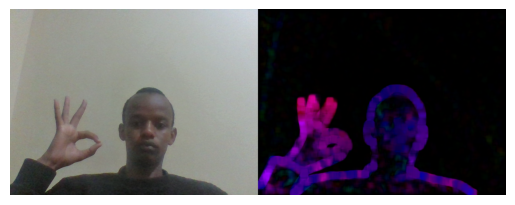

In [4]:
rgb_image = cv2.cvtColor(concat_bgr_optical, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.axis('off')
plt.show()

In [5]:
frame2.shape, bgr.shape

((480, 640, 3), (480, 640, 3))

In [6]:
#Create a a blank canvas for keypoints.
canvas = np.zeros((480, 640, 3), dtype = 'uint8') #The canvas shape should be the same as the bgr image.

In [7]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

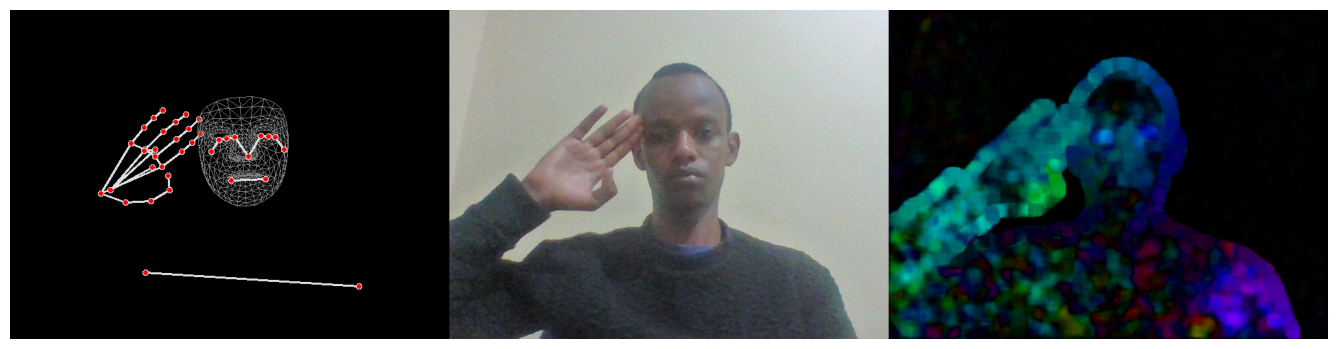

In [14]:
with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    
    # results = holistic.process(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
    results = holistic.process(frame2)

    
    #Make a copy of bgr image.
    annotated_image = canvas.copy()
    
    #Draw landmarks.
    #Right hand landmarks.
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS)
    
    #Left hand landmarks.
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS)
    
    #Face landmarks.
    mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, 
                              mp_holistic.FACEMESH_TESSELATION, 
                              landmark_drawing_spec=None, 
                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
    
    #Pose landmarks.
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, 
                              mp_holistic.POSE_CONNECTIONS)
    
    
    #Concatenate images.
    concat_3_images = cv2.hconcat([annotated_image, concat_bgr_optical])
    
    plt.figure(figsize = (17, 8))
    plt.imshow(cv2.cvtColor(concat_3_images, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Perform real-time inference.

In [10]:
cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255



while (1):
    ret, frame2 = cap.read()
    
    if not ret:
        print('No frames grabbed.')
        break
        
    next_ = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs, next_, None, 0.5, 
                                        3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    #Concatenate bgr and optical flow.
    concat_bgr_optical = cv2.hconcat([frame2, bgr])
    
    #Obtain video keypoints.
    with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:

        # results = holistic.process(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
        results = holistic.process(frame2)


        #Make a copy of bgr image.
        annotated_image = canvas.copy()

        #Draw landmarks.
        #Right hand landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, 
                                  mp_holistic.HAND_CONNECTIONS)

        #Left hand landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, 
                                  mp_holistic.HAND_CONNECTIONS)

        #Face landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, 
                                  mp_holistic.FACEMESH_TESSELATION, 
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

        #Pose landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, 
                                  mp_holistic.POSE_CONNECTIONS)


        #Concatenate images.
        concat_3_images = cv2.hconcat([annotated_image, concat_bgr_optical])

        cv2.imshow('frame2', concat_3_images)

        k = cv2.waitKey(20) & 0xFF
        if k == ord('q'):
            break
        prvs = next_

cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread (0x2e47590).
Cannot move to target thread (0x2819ac0)

QObject::moveToThread: Current thread (0x2819ac0) is not the object's thread

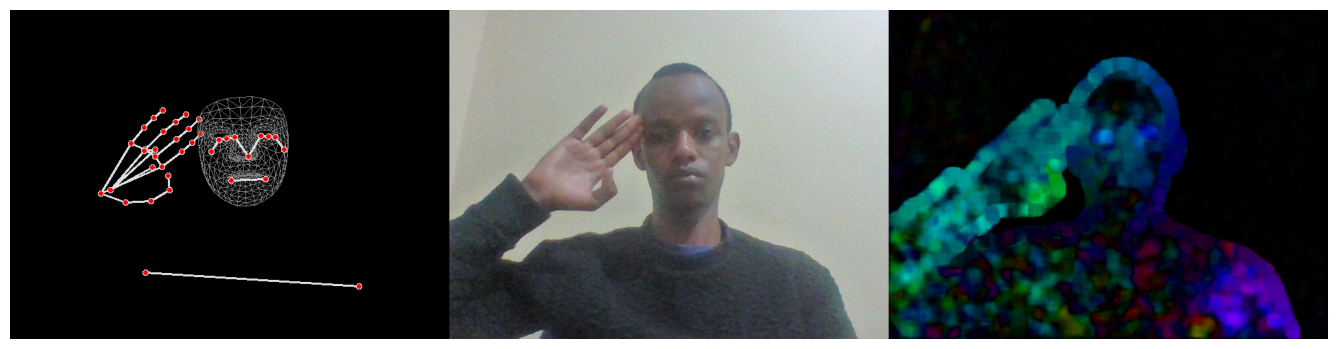

In [11]:
rgb_image = cv2.cvtColor(concat_3_images, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (17, 8))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()